#### This script focuses on cleaning the artist data from the US market, as well as EDA

Import libraries that will likely be used

In [1]:
import pandas as pd
import numpy as np
import spotipy as sp
import os

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

This file is likely cleaner that the foreign market artist data, but we should still check for duplicates

In [2]:
pd_US = pd.read_csv('artists.csv')
pd_US.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


No year column, so there's probably no duplicates.
<br>Let's drop them just in case

In [3]:
pd_US.sort_values('popularity', ascending=False, inplace=True)

print(f"There are {pd_US.size} artists before duplicates removed")
pd_US.drop_duplicates(subset= "name", keep= 'first', inplace= True)
print(f"There are {pd_US.size} artists after duplicates removed")

pd_US.head()

There are 5521745 artists before duplicates removed
There are 5393300 artists after duplicates removed


,id,followers,genres,name,popularity
144481,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100
115489,4q3ewBCX7sLwd24euuV69X,32244734.0,"['latin', 'reggaeton', 'trap latino']",Bad Bunny,98
126338,06HL4z0CvFAxyc27GXpf02,38869193.0,"['pop', 'post-teen pop']",Taylor Swift,98
313676,3TVXtAsR1Inumwj472S9r4,54416812.0,"['canadian hip hop', 'canadian pop', 'hip hop'...",Drake,98
144484,3Nrfpe0tUJi4K4DXYWgMUX,31623813.0,"['k-pop', 'k-pop boy group']",BTS,96


Looks like removing duplicates was a good idea!
Now let's take a closer look at the artists according to popularity.

In [4]:
print(f"There are {pd_US[pd_US['popularity']==0].size} artists with popularity equal to 0"
      f" which is {round(100*((pd_US[pd_US['popularity']==0].size)/pd_US.size),1)} percent")
for n in range(0, 100, 10):
    print(f"There are {pd_US[pd_US['popularity']>n].size} artists with popularity above {n}"
          f" which is {round(100*((pd_US[pd_US['popularity']>n].size)/pd_US.size),3)} percent")

There are 2296700 artists with popularity equal to 0 which is 42.6 percent
There are 3096600 artists with popularity above 0 which is 57.416 percent
There are 1573860 artists with popularity above 10 which is 29.182 percent
There are 956690 artists with popularity above 20 which is 17.738 percent
There are 533130 artists with popularity above 30 which is 9.885 percent
There are 256585 artists with popularity above 40 which is 4.757 percent
There are 103080 artists with popularity above 50 which is 1.911 percent
There are 33680 artists with popularity above 60 which is 0.624 percent
There are 8545 artists with popularity above 70 which is 0.158 percent
There are 1705 artists with popularity above 80 which is 0.032 percent
There are 190 artists with popularity above 90 which is 0.004 percent


Looks like 70% of artists have popularity in range {0-9].
<br>Keeping this data will probably skew our data and make graphs harder to read,
so let's only keep artists with popularity >10
<br><br>We can also make a copy of the artists with popularity >90, since that will be used in later analyses

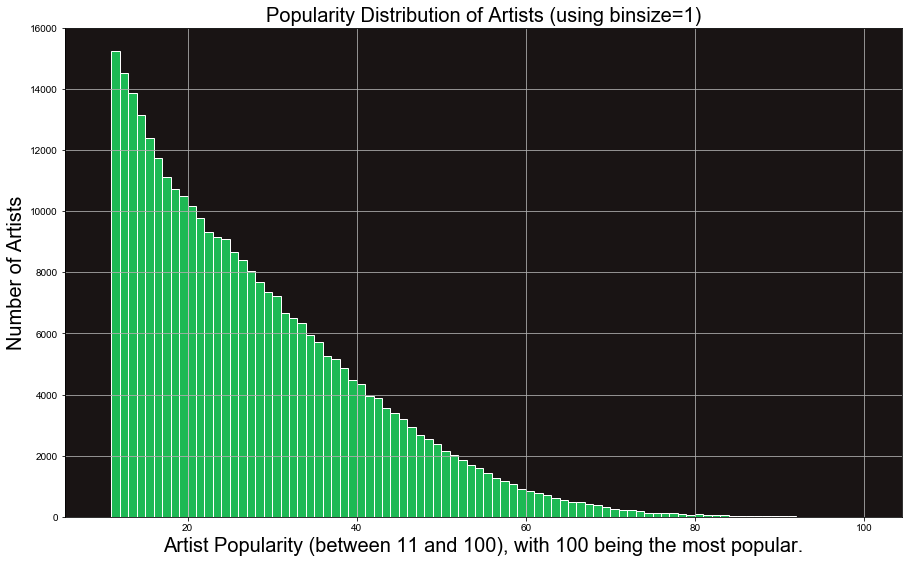

In [5]:
# start with a standard-scaled plot
top_90 = pd_US[pd_US['popularity']>=90].copy()
above_10 = pd_US[pd_US['popularity']>10].copy()

binsize = 1
bins = np.arange(10, above_10['popularity'].max()+binsize, binsize)
fig, ax = plt.subplots(figsize = (15,9))

ax.set_facecolor('#191414')
ax.grid(True)
sns.set(style='darkgrid')

plt.hist(data = above_10, x = 'popularity', bins = bins, color='#1DB954')

plt.title('Popularity Distribution of Artists (using binsize=1)', size=20)
plt.xlabel('Artist Popularity (between 11 and 100), with 100 being the most popular.', size=20)
plt.ylabel('Number of Artists', size=20)

plt.savefig("Popularity Distribution of Artists above 10.png", dpi=300, bbox_inches='tight')
plt.show()


We could make a stacked bar graph, but we'd barely see anything for artists with popularity >80
<br>Let's take a closer look at the relationship between artist popularity and follower count

In [6]:
# We create 9 bins, one for every 10 points of popularity >10
pop_bins = pd.cut(above_10['popularity'], bins=[10,20,30,40,50,60,70,80,90,100])

# Let's compare popularity and follower metrics
above_10.groupby(pop_bins)[['popularity', 'followers']].agg(['count', 'min', 'max', 'mean', 'std']).round(2)

popularity                       followers                        \
                count min  max   mean   std     count       min         max   
popularity                                                                    
(10, 20]       123434  11   20  15.11  2.87    123432       0.0    228843.0   
(20, 30]        84712  21   30  25.22  2.85     84712       0.0   1094290.0   
(30, 40]        55309  31   40  35.09  2.84     55309       0.0    963817.0   
(40, 50]        30701  41   50  44.94  2.82     30701       0.0   1755942.0   
(50, 60]        13880  51   60  54.72  2.79     13880       2.0   3492917.0   
(60, 70]         5027  61   70  64.60  2.76      5027       9.0   6394966.0   
(70, 80]         1368  71   80  74.35  2.77      1368     466.0  18120286.0   
(80, 90]          303  81   90  84.07  2.71       303   12177.0  33665795.0   
(90, 100]          38  91  100  93.29  2.43        38  946550.0  78900234.0   

                                      
                   mean          std  
popularity                            
(10, 20]        1196.27      2901.00  
(20, 30]        3382.97      8448.48  
(30, 40]       10259.37     21518.73  
(40, 50]       34200.58     59975.77  
(50, 60]      124654.27    191245.88  
(60, 70]      477770.60    589485.18  
(70, 80]     1813219.00   1877975.81  
(80, 90]     7084554.99   6680226.20  
(90, 100]   23779108.13  18031817.65

In [7]:
# Out of curiosity
above_10[above_10[above_10['popularity']>10]['followers']==0].size

6950

Looks like the number followers versus popularity follows a logarithmic pattern.
<br> Let's plot this using a log scale

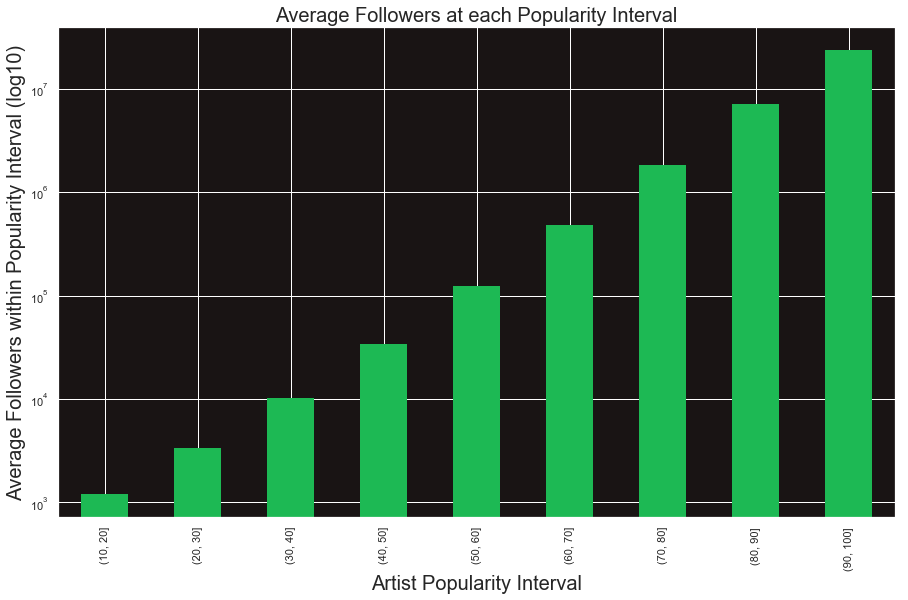

In [8]:
fig, ax = plt.subplots(figsize = (15,9))

ax.set_facecolor('#191414')
ax.grid(True)
sns.set(style='darkgrid')

above_10.groupby(pop_bins)['followers'].mean().plot.bar(ax=ax, color='#1DB954', linewidth=0)
plt.yscale('log')

plt.title('Average Followers at each Popularity Interval', size=20)
plt.xlabel('Artist Popularity Interval', size=20)
plt.ylabel('Average Followers within Popularity Interval (log10)', size=20)

plt.savefig("Avg Followers vs Pop Interval.png", dpi=300, bbox_inches='tight')
plt.show()


Let's also visualize using a scatter plot to see what the spread actually looks like

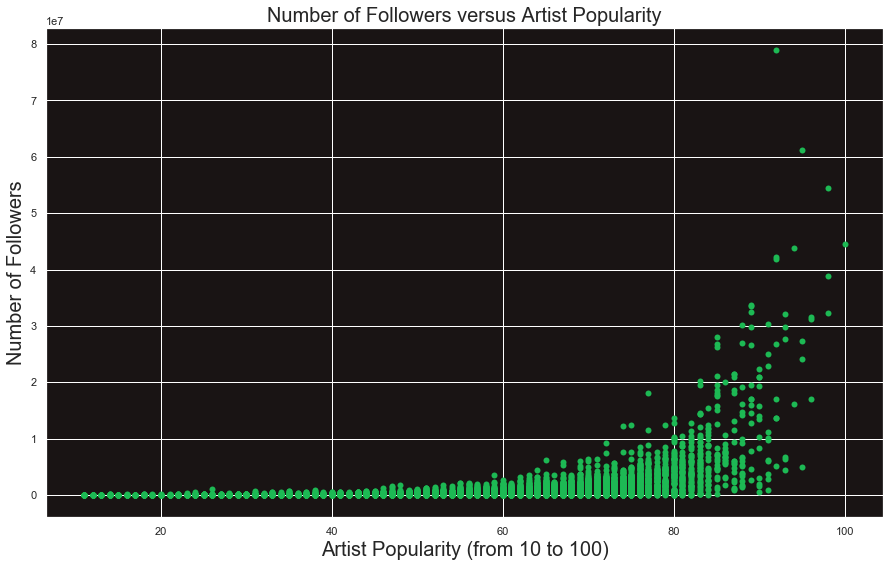

In [9]:
fig, ax = plt.subplots(figsize = (15,9))

ax.set_facecolor('#191414')
ax.grid(True)
sns.set(style='darkgrid')

plt.scatter(above_10['popularity'], above_10['followers'], color='#1DB954', linewidth=0)

plt.title('Number of Followers versus Artist Popularity', size=20)
plt.xlabel('Artist Popularity (from 10 to 100)', size=20)
plt.ylabel('Number of Followers', size=20)

plt.savefig("Followers vs Pop Scatter Plot.png", dpi=300, bbox_inches='tight')
plt.show()


We can take a closer look at the spread of followers across popularities through boxplots

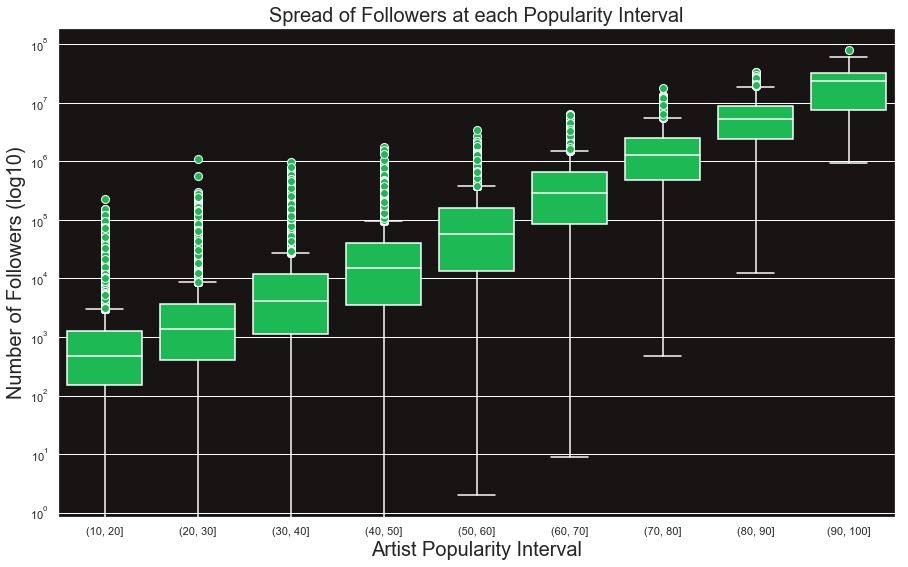

In [10]:
pd_followers = above_10[['popularity', 'followers']]

fig, ax = plt.subplots(figsize = (15,9))

ax.set_facecolor('#191414')
ax.grid(True)
sns.set(style='darkgrid')

flier_props = dict(marker='o', markerfacecolor='#1DB954', markersize=8,
                  linestyle='none', markeredgecolor='w')

ax = sns.boxplot(x=pop_bins, y='followers', data=pd_followers, flierprops= flier_props)


for i, box in enumerate(ax.artists):
    box.set_edgecolor('white')
    box.set_facecolor('#1DB954')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('white')
            
plt.yscale('log')

plt.title('Artist Followers at each Popularity Interval (log10)')

plt.title('Spread of Followers at each Popularity Interval', size=20)
plt.xlabel('Artist Popularity Interval', size=20)
plt.ylabel('Number of Followers (log10)', size=20)

plt.savefig("Number of Followers vs Pop Interval Box Plot.png", dpi=300, bbox_inches='tight')
plt.show()

If we use the entire dataset, there will definitely be bias for the smaller intervals.
<br>Let's save the artists with popularity >90 for later use.

In [11]:
top_90.to_csv("US_artists_above_90", index=False)